# Exploratory Data Analysis Project

## Introduction
#### When a high school graduate is deciding between five different colleges or more,  the rankings make it easier to determine what makes one college different from the others.   A graduate comes to me and asks to do a simple analysis in Quacquarelli Symmonds system ranking, and answer some questions he asked. 


## Brief about the Databset

#### This dataset contains rankings of the world universities by Quacquarelli Symmonds. The database contains 3 tables for each year talking about universities ranking with a thousand universities in different countries around the world. QS uses 6 factors for their ranking framework wiz. Academic Reputation, Employer Reputation, Faculty to Student Ratio, Number of citations per faculty, International Faculty, International Students. Another feature included in this data was Classification (which is not used for ranking) which included the institution's size, subject range, research intensity, age, and status. the database that is available to us is for three years began from 2017 till 2020.



## Tools
#### In this project I will be using SQLite and Python tools.

# Methodology

## Step 1 Ask Questions:

<li> The top 5 countries that contain most of the universities.
<li> Which are the universities that have Kept their ranking over the years?</li>
<li> Which are the universities get increased over the years?</li>
<li> What is the journey of Saudi universities on the university ranking?</li>

## Step 2 Call Dataset:

### Call up the libraries

In [1]:
# Call up all the important libraries

import sqlite3 as sql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Calling up dataset

In [2]:
#Call up the dataset for each table 
data="EDA-Project.db"
con=sql.connect(data)

#For the first table
query='''SELECT * FROM WUR2018'''
df=pd.read_sql_query(query,con)

#For the second table
query2='''SELECT * FROM WUR2019'''
df2=pd.read_sql_query(query2,con)

#For the third table 
query3='''SELECT * FROM WUR2020'''
df3=pd.read_sql_query(query3,con)


In [3]:
#Copy the original table for the first table
df_1=df.copy()

#Copy the original table for the second table
df_2=df2.copy()

#Copy the original table for the third table
df_3=df3.copy()

## Step 3 Clean Dataset:

In [4]:
#Rename the first tow coulmns to be all the tables names similar

#For the first table 
df.rename(columns={'2017': 'rank_2017', '2018': 'rank_2018'}, inplace=True)

#For the second table 
df2.rename(columns={'2019': 'rank_2019', '2018': 'rank_2018'}, inplace=True)

#For the third table 
df3.rename(columns={'Rankin2020': 'rank_2020', 'Rankin2019': 'rank_2019'}, inplace=True)

In [5]:
#There is '=' in the table does not mean any thing (my be get in there because changing the format of the dataset)

#Replace all the '=' sign in the first table.
df = df.replace('=','', regex=True)

#Replace all the '=' in sign in the second table.
df2 = df2.replace('=','', regex=True)

#Replace all the '=' in sign in the third table.
df3 = df3.replace('=','', regex=True)



In [6]:
#Delete the universties that have nall values in over the scors of the ranking 


#For first table
df.Overall_Score.replace('-', np.nan, inplace=True)
#df.Academic_Reputation_SCORE.replace('-', np.nan, inplace=True)< i didnot delatd becuse ---------
#df.Employer_Reputation_SCORE.replace('-', np.nan, inplace=True)
df.Faculty_Student_SCORE.replace('-', np.nan, inplace=True)
df.Citations_per_Faculty_SCORE.replace('-', np.nan, inplace=True)
df.International_Faculty_SCORE.replace('-', np.nan, inplace=True)
df.International_Students_SCORE.replace('-', np.nan, inplace=True)

df=df.dropna(subset=['Overall_Score','Institution_Name','Academic_Reputation_SCORE','Employer_Reputation_SCORE','Faculty_Student_SCORE','Citations_per_Faculty_SCORE','International_Faculty_SCORE','International_Students_SCORE'])

#For second table 

df2.Overall_Score.replace('-', np.nan, inplace=True)
df2.Academic_Reputation_SCORE.replace('-', np.nan, inplace=True)
df2.Employer_Reputation_SCORE.replace('-', np.nan, inplace=True)
df2.Faculty_Student_SCORE.replace('-', np.nan, inplace=True)
df2.Citations_per_Faculty_SCORE.replace('-', np.nan, inplace=True)
df2.International_Faculty_SCORE.replace('-', np.nan, inplace=True)
df2.International_Students_SCORE.replace('-', np.nan, inplace=True)

df2=df2.dropna(subset=['Overall_Score','Institution_Name','Academic_Reputation_SCORE','Employer_Reputation_SCORE','Faculty_Student_SCORE','Citations_per_Faculty_SCORE','International_Faculty_SCORE','International_Students_SCORE'])


#For third table 

df3.Overall_Score.replace('-', np.nan, inplace=True)
df3.Academic_Reputation_SCORE.replace('-', np.nan, inplace=True)
df3.Employer_Reputation_SCORE.replace('-', np.nan, inplace=True)
df3.Faculty_Student_SCORE.replace('-', np.nan, inplace=True)
df3.Citations_per_Faculty_SCORE.replace('-', np.nan, inplace=True)
df3.International_Faculty_SCORE.replace('-', np.nan, inplace=True)
df3.International_Students_SCORE.replace('-', np.nan, inplace=True)

df3=df3.dropna(subset=['Overall_Score','Institution_Name','Academic_Reputation_SCORE','Employer_Reputation_SCORE','Faculty_Student_SCORE','Citations_per_Faculty_SCORE','International_Faculty_SCORE','International_Students_SCORE'])




In [7]:
#Convert the wightspace in the Institution_Name columns to '_' 

#For the first table 
df['Institution_Name']=df['Institution_Name'].str.replace(" ","_")

#For second table 
df2['Institution_Name']=df2['Institution_Name'].str.replace(" ","_")

#For third table 
df3['Institution_Name']=df3['Institution_Name'].str.replace(" ","_")


In [8]:
#ALSO in the third coulmn the 'Institution_Name' is in lower case
df3['Institution_Name']=df3['Institution_Name'].str.upper()

In [9]:
#Convet the type of the scores columns from objectv to float 


#For the first table 
df['Overall_Score'] = df.Overall_Score.astype('float')
#df['Academic_Reputation_SCORE'] = df.Academic_Reputation_SCORE.astype('float')
#df['Employer_Reputation_SCORE'] = df.Employer_Reputation_SCORE.astype('float')
df['Faculty_Student_SCORE'] = df.Faculty_Student_SCORE.astype('float')
df['Citations_per_Faculty_SCORE'] = df.Citations_per_Faculty_SCORE.astype('float')
df['International_Faculty_SCORE'] = df.International_Faculty_SCORE.astype('float')
df['International_Students_SCORE'] = df.International_Students_SCORE.astype('float')
df['International_Students_SCORE'] = df.International_Students_SCORE.astype('float')


#For second table 
df2['Overall_Score'] = df2.Overall_Score.astype('float')
df2['Academic_Reputation_SCORE'] = df2.Academic_Reputation_SCORE.astype('float')
df2['Employer_Reputation_SCORE'] = df2.Employer_Reputation_SCORE.astype('float')
df2['Faculty_Student_SCORE'] = df2.Faculty_Student_SCORE.astype('float')
df2['Citations_per_Faculty_SCORE'] = df2.Citations_per_Faculty_SCORE.astype('float')
df2['International_Faculty_SCORE'] = df2.International_Faculty_SCORE.astype('float')


#For third table 
df3['Overall_Score'] = df3.Overall_Score.astype('float')
df3['Academic_Reputation_SCORE'] = df3.Academic_Reputation_SCORE.astype('float')
df3['Employer_Reputation_SCORE'] = df3.Employer_Reputation_SCORE.astype('float')
df3['Faculty_Student_SCORE'] = df3.Faculty_Student_SCORE.astype('float')
df3['Citations_per_Faculty_SCORE'] = df3.Citations_per_Faculty_SCORE.astype('float')
df3['International_Faculty_SCORE'] = df3.International_Faculty_SCORE.astype('float')
df3['International_Students_SCORE'] = df3.International_Students_SCORE.astype('float')


In [10]:
#change the first two columns to string insted of objectv

df['rank_2017'] = df.rank_2017.astype('str')
df['rank_2018'] = df.rank_2018.astype('str')

df2['rank_2018'] = df2.rank_2018.astype('str')
df2['rank_2019'] = df2.rank_2019.astype('str')


df3['rank_2019'] = df3.rank_2019.astype('str')
df3['rank_2020'] = df3.rank_2020.astype('str')


### Now we can merge the tables by the Institution Name

In [11]:
#Marge all the tables by the name of the unversties by creating a new tabel

df4=pd.merge(df,df2,on=['Institution_Name','Country'])
df_new=pd.merge(df4,df3,on=['Institution_Name','Country'])
df_new.shape

(442, 62)

##### The step below just to make sure that the Classifications do not change by the years for each university 

In [12]:
#Make sure about the Classifications do not change by the years for each university  

#for the ranking 
x=(df_new['rank_2018_x']==df_new['rank_2018_y']).count()
y=(df_new['rank_2019_x']==df_new['rank_2019_y']).count()
print(x,y)
#the Classifications
x1=(df_new['Classification_SIZE_x']==df_new['Classification_SIZE_y']).count()
x2=(df_new['Classification_SIZE_x']==df_new['Classification_SIZE']).count()
print(x1,x2)

x3=(df_new['Classification_FOCUS_x']==df_new['Classification_FOCUS_y']).count()
x4=(df_new['Classification_FOCUS_x']==df_new['Classification_FOCUS']).count()
print(x3,x4)


x5=(df_new['RESEARCH_INTENSITY_x']==df_new['RESEARCH_INTENSITY_y']).count()
x6=(df_new['RESEARCH_INTENSITY_x']==df_new['RESEARCH_INTENSITY']).count()
print(x5,x6)


x7=(df_new['AGE_x']==df_new['AGE_y']).count()
x8=(df_new['AGE_x']==df_new['AGE']).count()
print(x7,x8)

442 442
442 442
442 442
442 442
442 442


#### The steps below is  deleting some columns that i do not need in describing step, and rearrange the columns.

In [13]:
#After i done cleaning the dataset i realize tht i need a specific columns so i will drop the columns that i do not need 
df_new2=df_new.drop(df_new.columns[[0,4,5,6,7,8,10,12,14,16,18,20,24,25,26,27,28,30,32,34,36,38,40,43,48,50,52,54,56,58,60]], axis=1)




In [14]:
#Renaming some columns after the merge 
df_new2.rename(columns={'rank_2019_x': 'rank_2019', 'rank_2018_y': 'rank_2018','Overall_Score_x':'Overall_Score_2018','Overall_Score_y':'Overall_Score_2019','Overall_Score':'Overall_Score_2020','Academic_Reputation_SCORE':'Academic_Reputation_SCORE_z','Employer_Reputation_SCORE':'Employer_Reputation_SCORE_z','Faculty_Student_SCORE':'Faculty_Student_SCORE_z','Citations_per_Faculty_SCORE':'Citations_per_Faculty_SCORE_z','International_Faculty_SCORE':'International_Faculty_SCORE_z','International_Students_SCORE':'International_Students_SCORE_z'}, inplace=True)



#x means data from 2018
#y means data from 2019
#z means data from 2020

In [15]:
#Rearrange the columns in the final table 

df_new2=df_new2[['rank_2017','rank_2018','rank_2019','rank_2020', 'Institution_Name', 'Country','Classification_SIZE','Classification_FOCUS','RESEARCH_INTENSITY','AGE','Academic_Reputation_SCORE_x','Employer_Reputation_SCORE_x','Faculty_Student_SCORE_x','Citations_per_Faculty_SCORE_x','International_Faculty_SCORE_x','International_Students_SCORE_x','Academic_Reputation_SCORE_y','Employer_Reputation_SCORE_y','Faculty_Student_SCORE_y','Citations_per_Faculty_SCORE_y','International_Faculty_SCORE_y','International_Students_SCORE_y','Academic_Reputation_SCORE_z','Employer_Reputation_SCORE_z','Faculty_Student_SCORE_z','Citations_per_Faculty_SCORE_z','International_Faculty_SCORE_z','International_Students_SCORE_z','Overall_Score_2018','Overall_Score_2019','Overall_Score_2020']]


#### Save the final file 

In [16]:
df_new2.to_csv('df_new2.csv')


## Step 4 Discraibe and visualize:

### The top 5 countries that contain most of the universities

Text(0.5, 1.0, ' The top 5 countries contain most of the universities studied in this rank system ')

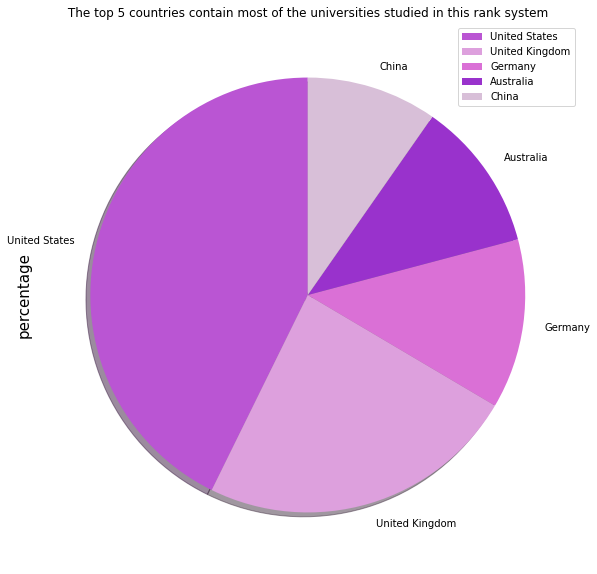

In [17]:
#The top 5 countries that contain most of the universities that studied in this system.  

df_new2_cal=((df_new2.groupby(['Country']).Institution_Name.agg(['count'])/442)*100)
df_new2_cal=(df_new2_cal.rename(columns={'count':'percentage','Country':'Country'})).sort_values(by='percentage',ascending=False).head(5)
df_new2_cal.plot(kind='pie', subplots=True, shadow = True,startangle=90,figsize=(10,10),colors={'darkorchid','mediumorchid','orchid','plum','thistle'})
plt.ylabel("percentage",fontsize=15)
plt.title(" The top 5 countries contain most of the universities studied in this rank system ")

### COMMENT :
#### The above plot show me top 5 universties contain most of the universities that rank system studied.

### summary about the Overall scors:

In [18]:
#summary about the overall scors

df_new2_summary=df_new2[['Overall_Score_2018','Overall_Score_2019','Overall_Score_2020']].agg(['count','max','min','median'])


### Which are the universities that have Kept their ranking over the years?


In [19]:
#Which are the universities that have Kept their ranking over the years?

mask = (df_new2.rank_2017==df_new2.rank_2018) & (df_new2.rank_2018==df_new2.rank_2019) & (df_new2.rank_2019==df_new2.rank_2020)
mask=df_new2[mask].head(5)


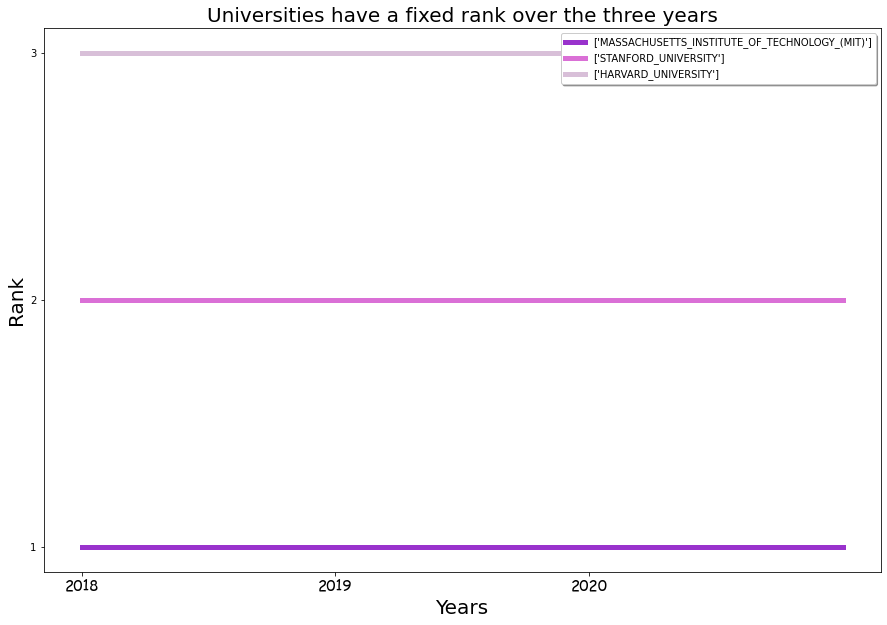

In [20]:
#plot for the information above
plt.figure(figsize = [15,10])
ticks_x = np.linspace(0, 2, 3)
years = ['2018','2019','2020']
plt.xticks(ticks_x, years, fontsize = '15', family = 'fantasy');


x=[]
j=0
for i,raw in mask.iterrows():
            x.append([mask['Institution_Name'].loc[i]])
            y=[mask['rank_2017'].loc[i],mask['rank_2018'].loc[i],mask['rank_2019'].loc[i],mask['rank_2020'].loc[i]]
            color=['darkorchid','orchid','thistle','mediumorchid','plum']
            plt.plot(y,linewidth=5,color=color[j])
            j+=1

plt.legend(x,shadow = True, loc = 1)
plt.title("Universities have a fixed rank over the three years",fontsize=20)
plt.xlabel('Years',fontsize = 20)
plt.ylabel('Rank',fontsize = 20);

### COMMENT :
#### The above plot show me universties that kept their rank for 4 years consecutive, may thier overall score got down but they are stil keeping thier position 

### Which are the universities whose overall score increased each year for three years consecutive?

In [25]:
#Top 5 universities their overall score increased each year for three years

mask1 = (df_new2.Overall_Score_2018<df_new2.Overall_Score_2019) & (df_new2.Overall_Score_2019<df_new2.Overall_Score_2020) 
mask1=df_new2[mask1].head(5)


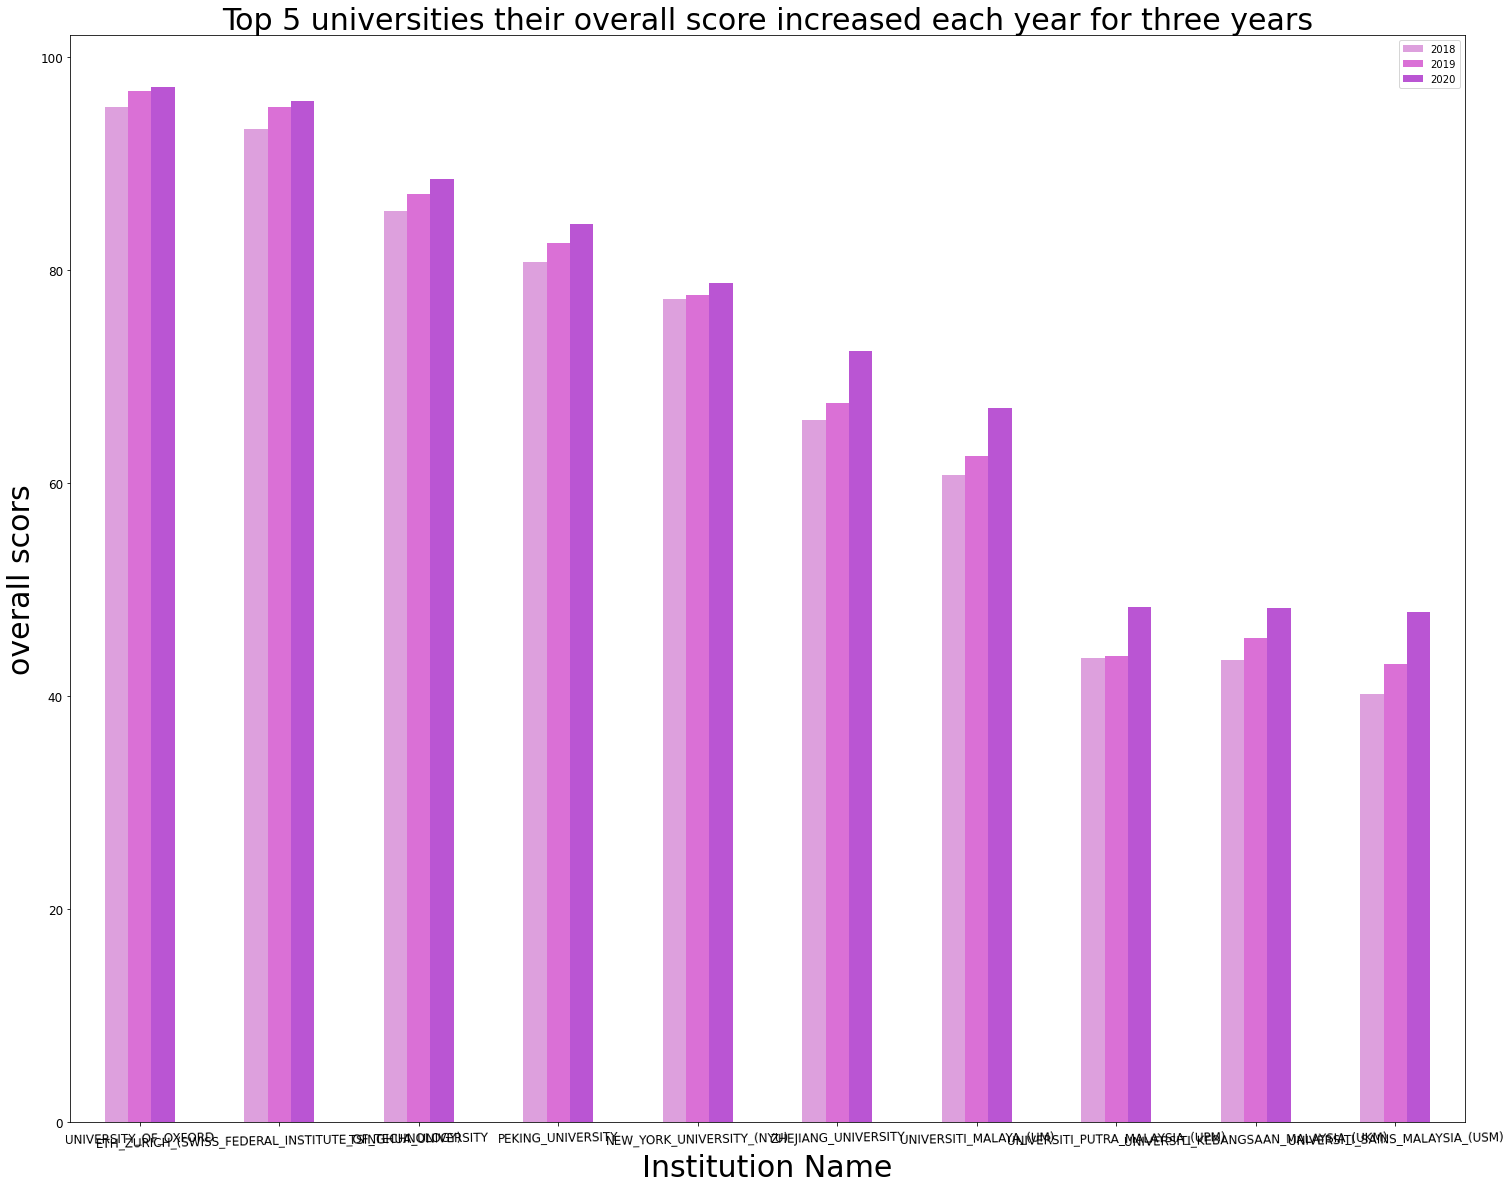

<Figure size 1800x1440 with 0 Axes>

In [24]:
# Top 5 universities their overall score increased each year for three years
mask1_p= pd.DataFrame({'2018': list(mask1['Overall_Score_2018']),
                    '2019': list(mask1['Overall_Score_2019']),
                      '2020':list(mask1['Overall_Score_2020'])}, index=mask1['Institution_Name'])

mask1_p.plot.bar(rot=1,color={"2018": "plum", "2019": "orchid","2020":"mediumorchid"},figsize = [25,20],fontsize = 12)



plt.title('Top 5 universities their overall score increased each year for three years',fontsize = 30)
plt.ylabel("overall scors",fontsize = 30)
plt.xlabel("Institution Name",fontsize = 30)

plt.figure(figsize = [25,20]);

### COMMENT:
#### The above plot shows me the top 5 universities their overall score increased each year for three years and never got down, so I can see that those universities try to improve from their performance in research and their reputation as this rank system focus

### What is the journey of the Saudis universities?

In [23]:
#Saudis universities 

mask2= (df_new2['Country']=='Saudi Arabia')
mask2=df_new2[mask2].head(5)


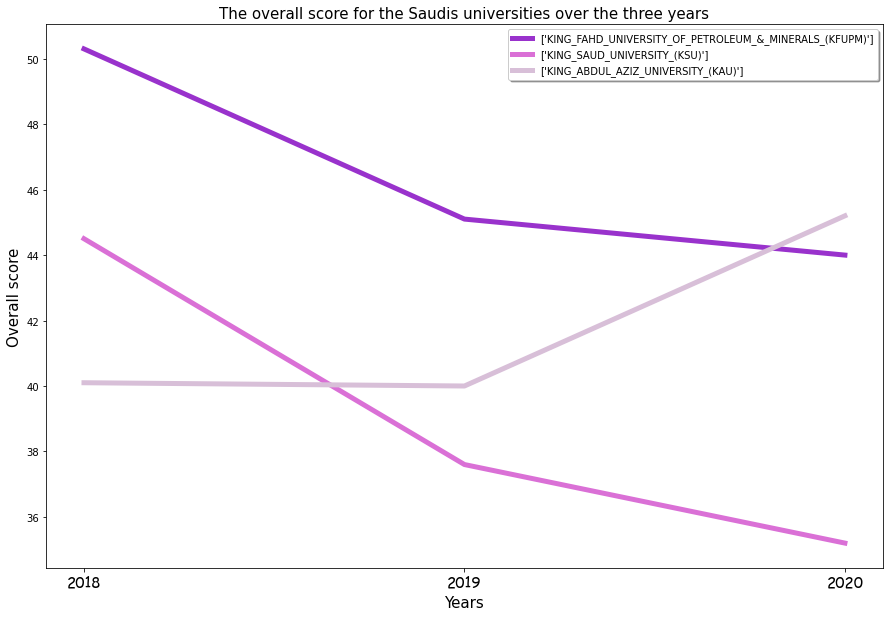

In [25]:
#what is the journey of the Saudis universities ?

plt.figure(figsize = [15,10])
ticks_x = np.linspace(0, 2, 3)
years = ['2018','2019','2020']
plt.xticks(ticks_x, years, fontsize = '15', family = 'fantasy');
x=[]
j=0
for i, row in mask2.iterrows():
        x.append([mask2['Institution_Name'].loc[i]])
        y=[mask2['Overall_Score_2018'].loc[i],mask2['Overall_Score_2019'].loc[i],mask2['Overall_Score_2020'].loc[i]]
        color=['darkorchid','orchid','thistle','mediumorchid','plum']
        plt.plot(y,linewidth=5,color=color[j])
        j+=1


plt.legend(x,shadow = True, loc = 1)
plt.title("The overall score for the Saudis universities over the three years",fontsize = 15)
plt.xlabel('Years',fontsize = 15)
plt.ylabel('Overall score',fontsize = 15);

### COMMENT :
#### The above plot shows me the journey of the Saudis universities over the three years, and obvious that we have two universities that got their overall score down except the King Abdulaziz university got increased.